# Transactions - Network Analysis

Shayna Howitt

May 18, 2020

## Background

The below data was pulled by Grassroots Economics from their community currency program. The raw data can be found [here](https://www.grassrootseconomics.org/research). More information about how the datasets were created can be found [here](https://github.com/GrassrootsEconomics/CIC-Docs/blob/master/TransactionDatasets.md).

## Purpose

This notebook will perform a preliminary exploration of the networks found within and between the communities involved in the community currency project.

## Conclusions

**Inter-Community Network**
- Each was connected to at least a couple other communities through transactions. None was on its own or just with a single other town. 
- There are uneven connections between the different communities - some are much closer to everyone else than others. 

**Intra-Community Network**
- There are definitive centers to 13 of the 14 unique communities (except Kang, which appears to have several centers). These centers are tightly knit groups of users who are the source for transactions with outside users. The outside users rarely interact with each other. 
- Network density changes from 0.0004 to 0.0081, which Chiga being the most dense network. 
- Degree and Betweenness Centrality is generally at the very bottom of the spectrum. However, a few users dominate these categories when present. I assume that these are staff members or other general facilitators - id nicknames: 0895_MIYANI, d243_OLYMPIC, and 2806_LINDI. 


In [1]:
import networkx as nx
from networkx import NetworkXError

from IPython.core.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
transactions = pd.read_csv('POA_tx_all_pub.csv')

In [3]:
communities_lst = transactions['s_comm_tkn'].dropna().unique()

In [4]:
transactions.isna().sum()

id                    0
timeset               0
source                0
s_comm_tkn         4792
s_gender           4792
s_business_type    4792
target                0
t_comm_tkn         3792
t_gender           3792
t_business_type    3792
tx_token              0
weight                0
tx_hash               0
type                  0
dtype: int64

**Made nicknames since the ids were long and unwieldy to read**

In [5]:
def make_graph_nickname(row, col_id, col_community):
    community = row[col_community]
    if community is np.nan:
        return row[col_id][-4:] + '_'
    else:
        return row[col_id][-4:] + '_' + community

In [6]:
transactions['source_id'] = transactions.apply(
    lambda x: make_graph_nickname(x, 'source', 's_comm_tkn'), 
    axis=1)

In [7]:
transactions['target_id'] = transactions.apply(
    lambda x: make_graph_nickname(x, 'target', 't_comm_tkn'), 
    axis=1)

# 1. Network b/w Communities

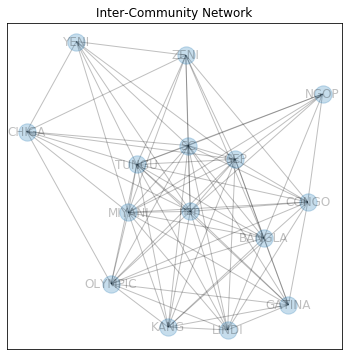

In [8]:
G = nx.from_pandas_edgelist(
    transactions,
    source='s_comm_tkn',
    target='t_comm_tkn'
)

fig, ax = plt.subplots(1,1, figsize=(6, 6))

nx.draw_networkx(G, alpha=0.25, with_labels=True, ax=ax)
ax.set_title('Inter-Community Network')
plt.show()

# 2. Network w/in Communities

## 2a. Sample Network within All Communities

100%|██████████| 14/14 [03:28<00:00, 14.93s/it]


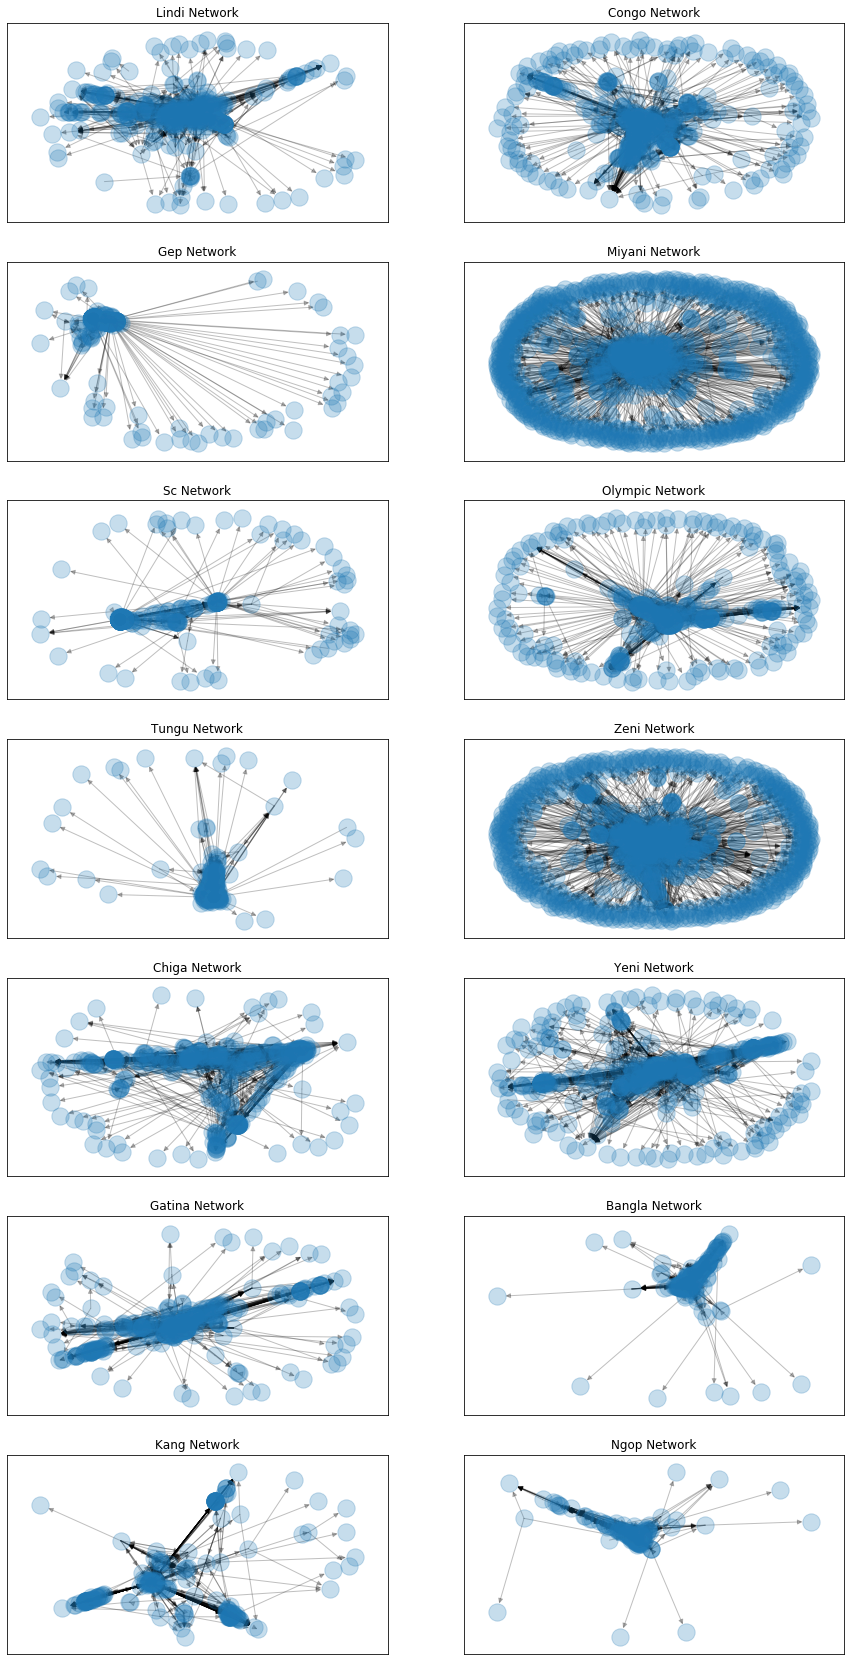

In [9]:
fig, axes = plt.subplots(7, 2, figsize=(15, 30))

for community, ax in tqdm(zip(communities_lst, axes.flatten()), total=14):
    
    community_subset_df = transactions[
        (transactions['s_comm_tkn'] == community) | 
        (transactions['t_comm_tkn'] == community)]
    
    G = nx.from_pandas_edgelist(
        community_subset_df.sample(5000, replace=True).drop_duplicates(),
        source='source_id',
        target='target_id',
        edge_attr='weight',
        create_using=nx.DiGraph()
    )

    nx.draw_networkx(G, alpha=0.25, with_labels=False, ax=ax)
    ax.set_title(f'{community.title()} Network')

plt.show()


## 2b. Comparing Community Network Stats

**Networkx Stats**

* Betweenness centrality: sum of fraction of all-pairs shortest paths that pass through node
* Degree: a count of how many edges it has 
* Degree centrality: fraction of nodes a single node is connected to
* Density: measure of the proportion of possible ties which are actualized among the members of a network
* Number of cliques: returns number of maximal cliques for each node
* Maximal clique: clique that cannot be extended by including one more vertex aka it is not a subset of a larger clique 

  0%|          | 0/14 [00:00<?, ?it/s]

# LINDI

Total transactions: 7759
Total individuals: 616
Total source/target combinations: 2838


**How connected is this network?**

Average shortest path length 2.155
Network density: 0.0075


*Most Betweenness Central Nodes* 


0895_MIYANI     0.685539
d243_OLYMPIC    0.066634
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.239024
2806_LINDI     0.188618
dtype: float64


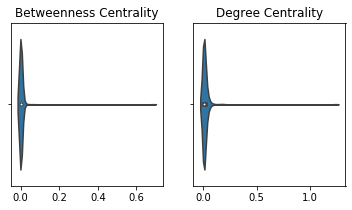

  7%|▋         | 1/14 [00:04<01:00,  4.65s/it]

# CONGO

Total transactions: 11147
Total individuals: 1026
Total source/target combinations: 4134


**How connected is this network?**

Average shortest path length 2.024
Network density: 0.0039


*Most Betweenness Central Nodes* 


0895_MIYANI    0.510776
36db_CONGO     0.255410
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    0.921951
36db_CONGO     0.608780
dtype: float64


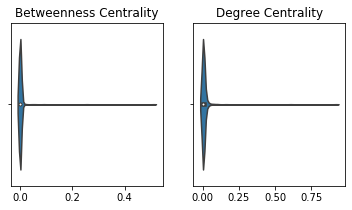

 14%|█▍        | 2/14 [00:16<01:22,  6.89s/it]

# GEP

Total transactions: 3245
Total individuals: 2144
Total source/target combinations: 2239


**How connected is this network?**

Average shortest path length 0.135
Network density: 0.0005


*Most Betweenness Central Nodes* 


5f96_GEP    0.033045
36af_GEP    0.025340
dtype: float64


*Most Degree Central Nodes* 


5f96_GEP    0.793280
36af_GEP    0.208119
dtype: float64


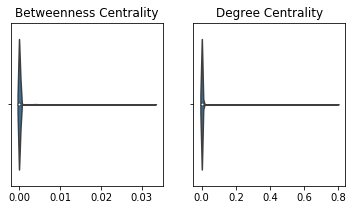

 21%|██▏       | 3/14 [00:25<01:20,  7.35s/it]

# MIYANI

Total transactions: 62204
Total individuals: 8049
Total source/target combinations: 26471


**How connected is this network?**

Average shortest path length 1.673
Network density: 0.0004


*Most Betweenness Central Nodes* 


0895_MIYANI    0.540317
5c7c_MIYANI    0.054734
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.205020
5f96_GEP       0.100522
dtype: float64


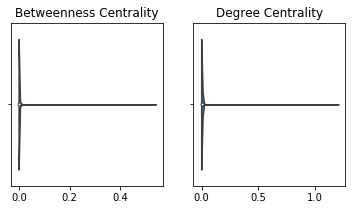

 29%|██▊       | 4/14 [14:36<43:26, 260.68s/it]

# SC

Total transactions: 2935
Total individuals: 1961
Total source/target combinations: 2103


**How connected is this network?**

Average shortest path length 0.146
Network density: 0.0005


*Most Betweenness Central Nodes* 


681a_SC    0.051383
8e15_SC    0.026216
dtype: float64


*Most Degree Central Nodes* 


681a_SC    0.955612
8e15_SC    0.069388
dtype: float64


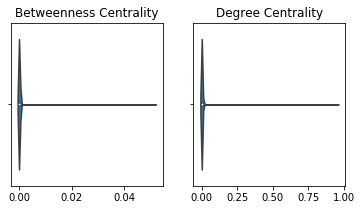

 36%|███▌      | 5/14 [14:43<27:39, 184.37s/it]

# OLYMPIC

Total transactions: 3263
Total individuals: 637
Total source/target combinations: 1578


**How connected is this network?**

Average shortest path length 1.978
Network density: 0.0039


*Most Betweenness Central Nodes* 


0895_MIYANI     0.511862
d243_OLYMPIC    0.345150
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI     0.819182
d243_OLYMPIC    0.551887
dtype: float64


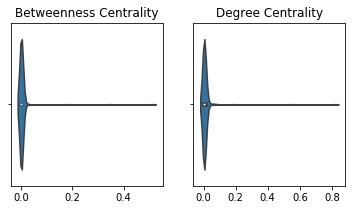

 43%|████▎     | 6/14 [14:46<17:21, 130.17s/it]

# TUNGU

Total transactions: 3553
Total individuals: 874
Total source/target combinations: 1917


**How connected is this network?**

Average shortest path length 0.843
Network density: 0.0025


*Most Betweenness Central Nodes* 


1e11_TUNGU     0.209640
0895_MIYANI    0.165713
dtype: float64


*Most Degree Central Nodes* 


1e11_TUNGU     0.808706
0895_MIYANI    0.434135
dtype: float64


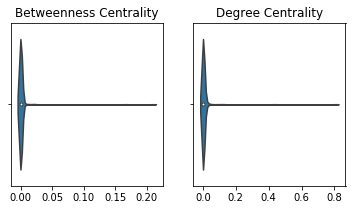

 50%|█████     | 7/14 [14:51<10:47, 92.54s/it] 

# ZENI

Total transactions: 20686
Total individuals: 2583
Total source/target combinations: 10583


**How connected is this network?**

Average shortest path length 2.934
Network density: 0.0016


*Most Betweenness Central Nodes* 


0895_MIYANI    0.662029
0810_ZENI      0.126588
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    0.768784
681a_SC        0.170798
dtype: float64


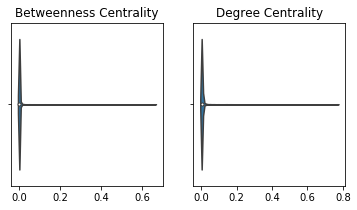

 57%|█████▋    | 8/14 [16:24<09:15, 92.64s/it]

# CHIGA

Total transactions: 3145
Total individuals: 417
Total source/target combinations: 1404


**How connected is this network?**

Average shortest path length 2.55
Network density: 0.0081


*Most Betweenness Central Nodes* 


0895_MIYANI    0.360275
7067_CHIGA     0.168866
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    0.552885
8067_CHIGA     0.230769
dtype: float64


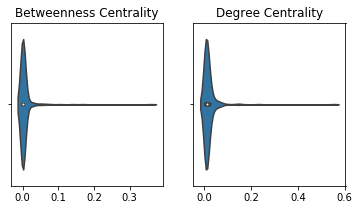

 64%|██████▍   | 9/14 [16:26<05:27, 65.46s/it]

# YENI

Total transactions: 3906
Total individuals: 697
Total source/target combinations: 2301


**How connected is this network?**

Average shortest path length 2.784
Network density: 0.0047


*Most Betweenness Central Nodes* 


0895_MIYANI    0.418694
a42a_YENI      0.366089
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    0.691092
a42a_YENI      0.541667
dtype: float64


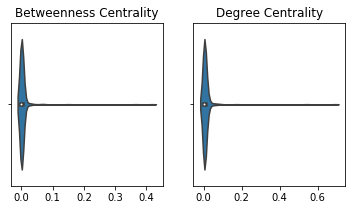

 71%|███████▏  | 10/14 [16:32<03:10, 47.59s/it]

# GATINA

Total transactions: 5754
Total individuals: 576
Total source/target combinations: 2208


**How connected is this network?**

unable to find shortest path: Graph is not weakly connected.
Network density: 0.0067


*Most Betweenness Central Nodes* 


0895_MIYANI     0.660971
d243_OLYMPIC    0.097746
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.080000
95ce_          0.156522
dtype: float64


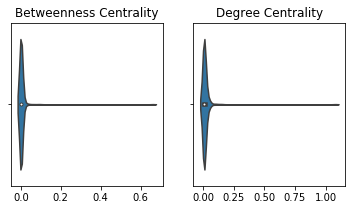

 79%|███████▊  | 11/14 [16:34<01:42, 34.02s/it]

# BANGLA

Total transactions: 3020
Total individuals: 273
Total source/target combinations: 1571


**How connected is this network?**

Average shortest path length 1.995
Network density: 0.0212


*Most Betweenness Central Nodes* 


0895_MIYANI    0.589249
36af_GEP       0.130521
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.238971
95ce_          0.279412
dtype: float64


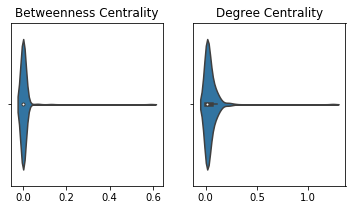

 86%|████████▌ | 12/14 [16:36<00:48, 24.21s/it]

# KANG

Total transactions: 1417
Total individuals: 175
Total source/target combinations: 569


**How connected is this network?**

Average shortest path length 1.61
Network density: 0.0187


*Most Betweenness Central Nodes* 


0895_MIYANI    0.731946
e1f5_KANG      0.019624
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.580460
95ce_          0.235632
dtype: float64


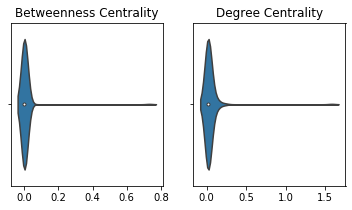

 93%|█████████▎| 13/14 [16:36<00:17, 17.18s/it]

# NGOP

Total transactions: 2900
Total individuals: 172
Total source/target combinations: 1133


**How connected is this network?**

Average shortest path length 1.876
Network density: 0.0385


*Most Betweenness Central Nodes* 


0895_MIYANI    0.741868
c9f7_NGOP      0.039032
dtype: float64


*Most Degree Central Nodes* 


0895_MIYANI    1.695906
95ce_          0.549708
dtype: float64


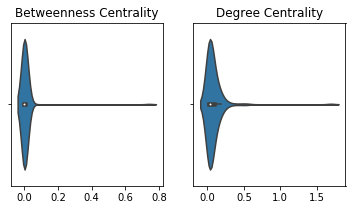

100%|██████████| 14/14 [16:37<00:00, 71.27s/it]


In [10]:
for community in tqdm(communities_lst):
    display(Markdown(f'# {community}'))
    
    community_subset_df = transactions[
        (transactions['s_comm_tkn'] == community) | 
        (transactions['t_comm_tkn'] == community)
    ]
    
    print(f'Total transactions: {community_subset_df.shape[0]}')
    
    G = nx.from_pandas_edgelist(
        community_subset_df,
        source='source_id',
        target='target_id',
        edge_attr='weight',
        create_using=nx.DiGraph()
    )
    
    print(f'Total individuals: {G.number_of_nodes()}')
    print(f'Total source/target combinations: {G.number_of_edges()}')
    
    display(Markdown('**How connected is this network?**'))
    try:
        shortest_path = nx.average_shortest_path_length(G)
        print(f'Average shortest path length {round(shortest_path, 3)}')
    except NetworkXError as err: 
        print(f'unable to find shortest path: {err}')
    
    print(f'Network density: {round(nx.density(G), 4)}')
    
    betweenness_series = pd.Series(nx.betweenness_centrality(G))
    degree_centrality_series = pd.Series(nx.degree_centrality(G))
    
    display(Markdown('*Most Betweenness Central Nodes* \n'))
    print(betweenness_series.sort_values(ascending=False).head(2))
    display(Markdown('*Most Degree Central Nodes* \n'))
    print(degree_centrality_series.sort_values(ascending=False).head(2))
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    sns.violinplot(betweenness_series, ax=axes[0])
    axes[0].set_title('Betweenness Centrality')
    sns.violinplot(degree_centrality_series, ax=axes[1])
    axes[1].set_title('Degree Centrality')
    plt.show()
    